# Feature exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
import os
import sys
sys.path.append('../')
from setup import *
import seaborn as sns
from spectral_cube import SpectralCube
%matplotlib widget

In [2]:
params1g, params1gheader = fits.getdata(fitfilebase.format(1)+'_aic.fits', header=True)
params2g = fits.getdata(fitfilebase.format(2)+'_aic.fits')
xarray = np.linspace(0, params1gheader['NAXIS1']-1, params1gheader['NAXIS1'])
yarray = np.linspace(0, params1gheader['NAXIS2']-1, params1gheader['NAXIS2'])
xx, yy = np.meshgrid(xarray, yarray)
xx_params = np.array([xx, xx, xx])
yy_params = np.array([yy, yy, yy])
xx_props = xx_params.flatten()
yy_props = yy_params.flatten()

amplitudes = np.array([params1g[0], params2g[0], params2g[3]]).flatten()
e_amplitudes = np.array([params1g[3], params2g[6], params2g[9]]).flatten()
cent_velocities = np.array([params1g[1], params2g[1], params2g[4]]).flatten()
e_cent_velocities = np.array([params1g[4], params2g[7], params2g[10]]).flatten()
sigma_vs = np.array([params1g[2], params2g[2], params2g[5]]).flatten()
e_sigma_vs = np.array([params1g[5], params2g[8], params2g[11]]).flatten()

In [3]:
# we first load all the features
index_stay = np.where(~np.isnan(amplitudes))
amplitudes = amplitudes[index_stay]
e_amplitudes = e_amplitudes[index_stay]
cent_velocities = cent_velocities[index_stay]
e_cent_velocities = e_cent_velocities[index_stay]
sigma_vs = sigma_vs[index_stay]
e_sigma_vs = e_sigma_vs[index_stay]
xx_props = xx_props[index_stay]
yy_props = yy_props[index_stay]


In [4]:
ds_feats = pd.DataFrame(data=np.transpose([xx_props, yy_props, amplitudes, cent_velocities, sigma_vs]), 
                        columns=['x_pix', 'y_pix', 'amplitude', 'vlsr', 'sigma_v'])



In [5]:
# sns.pairplot(ds_feats, kind='kde',diag_kind = 'kde', corner=True)
# plt.savefig('corner_plot.pdf')
# from this, maybe adding the amplitude could help

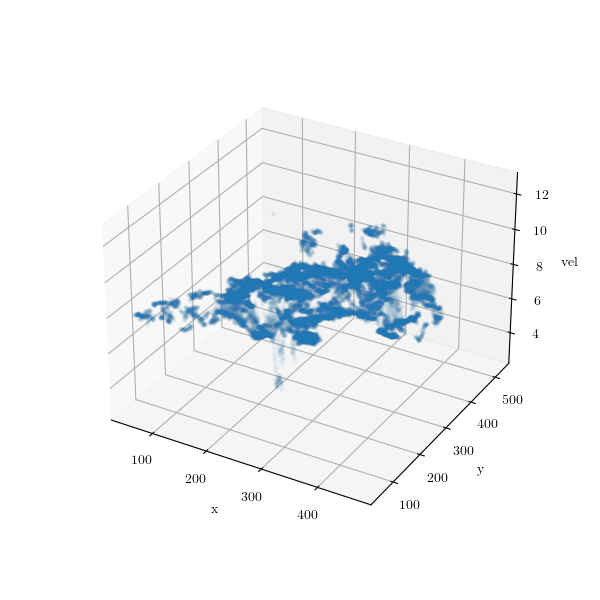

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('vel')
ax.scatter(xx_props, yy_props, cent_velocities, marker='.', alpha=0.02)